#### Sign Language Digits Classification
A project of Turkey Ankara Ayrancı Anadolu High School's Sign Language Digits Predition with image Dataset

### Image preparation 
* 10 classes (digits 0-9)
* Class data:
        * class 0: 205 images
        * class 1: 206 images
        * class 2: 206 images
        * class 3: 206 images
        * class 4: 207 images
        * class 5: 207 images
        * class 6: 207 images
        * class 7: 206 images
        * class 8: 208 images
        * class 9: 204 images

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import os

import keras
from keras import backend as k
from keras.models import Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.image import imread

%matplotlib inline

Using TensorFlow backend.


## Create train/test/valid folder

In [67]:
# Save file to Sign Language Digits Datasets directory
# Create train, valid, test folder in Sign Language Digits Datasets
%cd Datasets
%mkdir train
%mkdir valid
%mkdir test

C:\Users\SAM\Desktop\AI Practice Project\CNN With Keras&TF\Sign Language Digits Classification\Datasets


In [21]:
#Move all class directories with images into train
#%mv 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/ train/

In [68]:
# Make class directories for valid and test data sets
%cd valid
%mkdir 0
%mkdir 1
%mkdir 2
%mkdir 3
%mkdir 4
%mkdir 5
%mkdir 6
%mkdir 7
%mkdir 8
%mkdir 9

%cd ../test
%mkdir 0
%mkdir 1
%mkdir 2
%mkdir 3
%mkdir 4
%mkdir 5
%mkdir 6
%mkdir 7
%mkdir 8
%mkdir 9

C:\Users\SAM\Desktop\AI Practice Project\CNN With Keras&TF\Sign Language Digits Classification\Datasets\valid
C:\Users\SAM\Desktop\AI Practice Project\CNN With Keras&TF\Sign Language Digits Classification\Datasets\test


**In the next cell, Using bash, loop throuh each class directory in /train and randomly move 30 images from each class into the corresponding class directory in /valid and 5 images from each class into the corresponding class directory in /test**

In [72]:
os.listdir()

['test', 'train', 'valid']

In [73]:
%%bash
cd train
for ((i=0; i<=9; i++)); do
    a=$(find $i/ -type f | shuf -n 30)
    mv $a ../valid/$i/
    
    b=$(find $i/ -type f | shuf -n 5)
    mv $b ../test/$i/
done

In [75]:
#Move back into current notebook directory
%cd ..
os.listdir()

C:\Users\SAM\Desktop\AI Practice Project\CNN With Keras&TF\Sign Language Digits Classification


['.ipynb_checkpoints',
 'Datasets',
 'Examples',
 'Sign language digits classifier.ipynb']

## Explore datasets folder

In [77]:
os.listdir('Datasets')

['test', 'train', 'valid']

In [79]:
os.listdir('Datasets/train/4')[0]

'IMG_1122.JPG'

In [78]:
image_path = 'Datasets/train/4/IMG_1122.JPG'
image_path

'Datasets/train/4/IMG_1122.JPG'

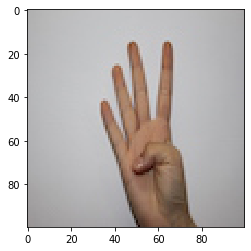

In [80]:
image = plt.imread(image_path)
plt.imshow(image)

In [87]:
print(os.listdir('Datasets'))

['test', 'train', 'valid']


### Set path info

In [2]:
train_path = 'Datasets/train' 
valid_path = 'Datasets/valid'
test_path = 'Datasets/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, 
    target_size=(224,224), 
    batch_size=10, 
    shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## MobileNet from keras

In [81]:
mobile = keras.applications.mobilenet.MobileNet()

In [91]:
#mobile.summary()

In [93]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [96]:
model = Model(inputs=mobile.input, outputs=predictions)

In [98]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [99]:
### Make some last 20-25 layers as trainable False
for layer in model.layers[:-23]:
    layer.trainable = False

## Train the fine-tuned model

In [100]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
model.fit_generator(train_batches, 
                    steps_per_epoch=18,
                    validation_data=valid_batches,
                    validation_steps=3,
                    epochs=60, verbose=2)

Epoch 1/60
 - 69s - loss: 1.5839 - accuracy: 0.5333 - val_loss: 5.9936 - val_accuracy: 0.2000
Epoch 2/60
 - 28s - loss: 0.5294 - accuracy: 0.8140 - val_loss: 5.8810 - val_accuracy: 0.1333
Epoch 3/60
 - 29s - loss: 0.5119 - accuracy: 0.8333 - val_loss: 5.9113 - val_accuracy: 0.2667
Epoch 4/60
 - 29s - loss: 0.3070 - accuracy: 0.8944 - val_loss: 5.2042 - val_accuracy: 0.4667
Epoch 5/60
 - 29s - loss: 0.3736 - accuracy: 0.8722 - val_loss: 1.8017 - val_accuracy: 0.4333
Epoch 6/60
 - 29s - loss: 0.3366 - accuracy: 0.8833 - val_loss: 0.9217 - val_accuracy: 0.6667
Epoch 7/60
 - 29s - loss: 0.3370 - accuracy: 0.8944 - val_loss: 0.4482 - val_accuracy: 0.8667
Epoch 8/60
 - 29s - loss: 0.1986 - accuracy: 0.9278 - val_loss: 0.3565 - val_accuracy: 0.5667
Epoch 9/60
 - 29s - loss: 0.2113 - accuracy: 0.9444 - val_loss: 1.6689 - val_accuracy: 0.7333
Epoch 10/60
 - 30s - loss: 0.1404 - accuracy: 0.9556 - val_loss: 2.0764 - val_accuracy: 0.7333
Epoch 11/60
 - 29s - loss: 0.0403 - accuracy: 0.9833 - val_

### Model Evaluations

In [103]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,val_loss,val_accuracy,loss,accuracy
0,5.993554,0.200000,1.583921,0.533333
1,5.881024,0.133333,0.552042,0.813953
2,5.911334,0.266667,0.511907,0.833333
3,5.204234,0.466667,0.307016,0.894444
4,1.801698,0.433333,0.373568,0.872222


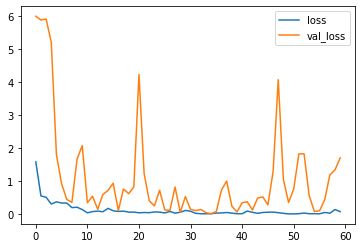

In [104]:
model_loss[['loss','val_loss']].plot()

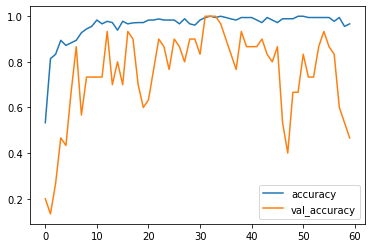

In [105]:
model_loss[['accuracy','val_accuracy']].plot()

## Predict sign language digits

In [14]:
test_labels = test_batches.classes

In [15]:
#Classes
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [107]:
predictions = model.predict_generator(test_batches, steps=5, verbose=0)

In [110]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

#### confusion_matrix plot function from sklearn

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 1 2 0 0 0 2]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 2 0 0 0 3 0 0 0]
 [0 0 0 1 0 0 0 4 0 0]
 [0 0 1 0 0 2 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 5]]


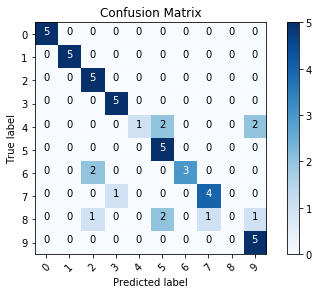

In [114]:
cm_plot_lables = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_lables, title='Confusion Matrix')

In [117]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.62      1.00      0.77         5
           3       0.83      1.00      0.91         5
           4       1.00      0.20      0.33         5
           5       0.56      1.00      0.71         5
           6       1.00      0.60      0.75         5
           7       0.80      0.80      0.80         5
           8       0.00      0.00      0.00         5
           9       0.62      1.00      0.77         5

    accuracy                           0.76        50
   macro avg       0.74      0.76      0.70        50
weighted avg       0.74      0.76      0.70        50



E:\Anaconda Program Data\Program Data\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**From above report we can see prediction of digit 4 and 8 is bad rate of accuracy.**

**Need some regularization for prediction with good accuracy for single digit**

## Adding Early Stopping for prevention of overfitting

In [4]:
mobile = keras.applications.mobilenet.MobileNet()

In [5]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [6]:
new_model = Model(inputs=mobile.input, outputs=predictions)

In [8]:
### Make some last 20-25b layers as trainable False
for layer in new_model.layers[:-23]:
    layer.trainable = False

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=25)

In [12]:
new_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
new_model.fit_generator(train_batches, 
                    steps_per_epoch=18,
                    validation_data=valid_batches,
                    validation_steps=3,
                    epochs=60, verbose=2,
                    callbacks=[early_stop])

Epoch 1/60
 - 83s - loss: 1.4420 - accuracy: 0.5333 - val_loss: 6.0998 - val_accuracy: 0.1333
Epoch 2/60
 - 30s - loss: 0.7152 - accuracy: 0.8111 - val_loss: 5.1445 - val_accuracy: 0.2000
Epoch 3/60
 - 51s - loss: 0.4541 - accuracy: 0.8556 - val_loss: 4.8063 - val_accuracy: 0.2333
Epoch 4/60
 - 30s - loss: 0.2140 - accuracy: 0.9500 - val_loss: 0.8805 - val_accuracy: 0.5667
Epoch 5/60
 - 28s - loss: 0.3450 - accuracy: 0.8721 - val_loss: 2.7592 - val_accuracy: 0.3333
Epoch 6/60
 - 29s - loss: 0.2888 - accuracy: 0.9111 - val_loss: 3.3780 - val_accuracy: 0.4667
Epoch 7/60
 - 29s - loss: 0.1487 - accuracy: 0.9222 - val_loss: 2.2311 - val_accuracy: 0.2333
Epoch 8/60
 - 30s - loss: 0.1886 - accuracy: 0.9444 - val_loss: 1.6509 - val_accuracy: 0.5333
Epoch 9/60
 - 31s - loss: 0.2214 - accuracy: 0.9000 - val_loss: 0.6346 - val_accuracy: 0.8000
Epoch 10/60
 - 31s - loss: 0.1268 - accuracy: 0.9556 - val_loss: 0.6183 - val_accuracy: 0.8667
Epoch 11/60
 - 28s - loss: 0.1032 - accuracy: 0.9611 - val_

## Evaluate and Predict sign language digits with new_model

In [19]:
new_model_loss= pd.DataFrame(new_model.history.history)

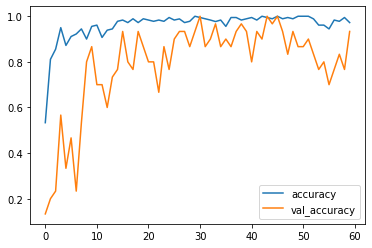

In [20]:
new_model_loss[['accuracy','val_accuracy']].plot()

In [21]:
new_predictions = new_model.predict_generator(test_batches, steps=5, verbose=0)

In [23]:
new_predictions.argmax(axis=1)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 6, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 9, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int64)

In [25]:
new_cm = confusion_matrix(test_labels, new_predictions.argmax(axis=1))

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 1 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 4 1]
 [0 0 0 0 0 0 0 0 0 5]]


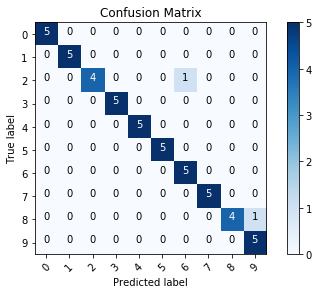

In [26]:
cm_plot_lables = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(new_cm, cm_plot_lables, title='Confusion Matrix')

In [27]:
### Save the model
new_model.save('sign-language-digits-predictor.h5')